<a href="https://colab.research.google.com/github/linkvarun/Jupyter_Notebook/blob/master/Word_Embeddings_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word To Vectors (Word2Vec)

Image and audio processing systems work with rich, high-dimensional datasets encoded as vectors of the individual raw pixel-intensities for image data, thus all the information is encoded in the data hence the relation between various entities in the system like (cats and dogs) can be established.

Word2vec’s applications extend beyond parsing sentences in the wild. It can be applied just as well to genes, code, likes, playlists, social media graphs and other verbal or symbolic series in which patterns may be discerned.

The purpose and usefulness of Word2vec is to group the vectors of similar words together in vectorspace. That is, it detects similarities mathematically. Word2vec creates vectors that are distributed numerical representations of word features, features such as the context of individual words. It does so without human intervention.

Given enough data, usage and contexts, Word2vec can make highly accurate guesses about a word’s meaning based on past appearances. Those guesses can be used to establish a word’s association with other words (e.g. “man” is to “boy” what “woman” is to “girl”), or cluster documents and classify them by topic. Those clusters can form the basis of search, sentiment analysis and recommendations in such diverse fields as scientific research, legal discovery, e-commerce and customer relationship management.

The output of the Word2vec neural net is a vocabulary in which each item has a vector attached to it, which can be fed into a deep-learning net or simply queried to detect relationships between words.

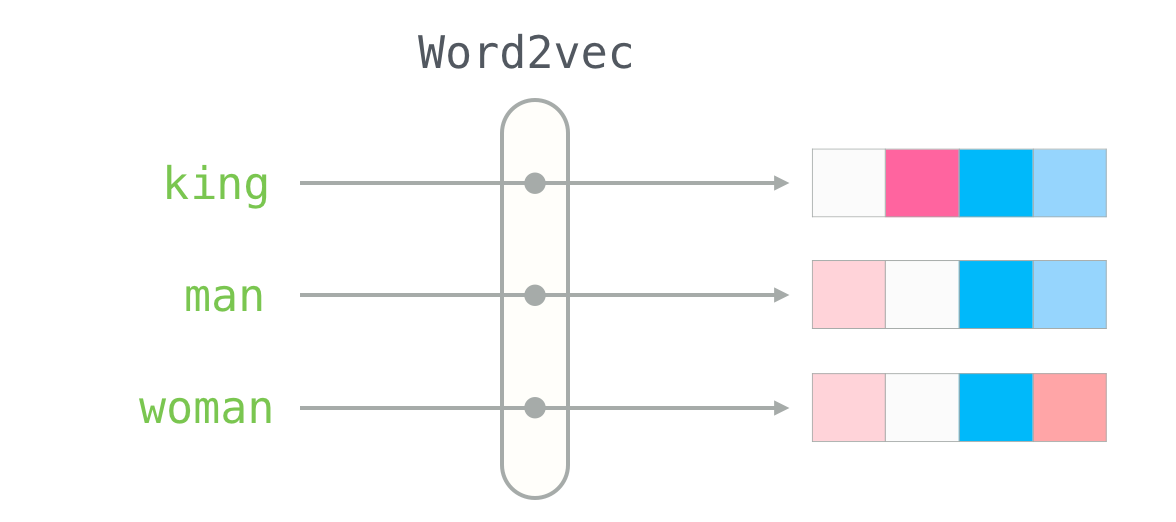

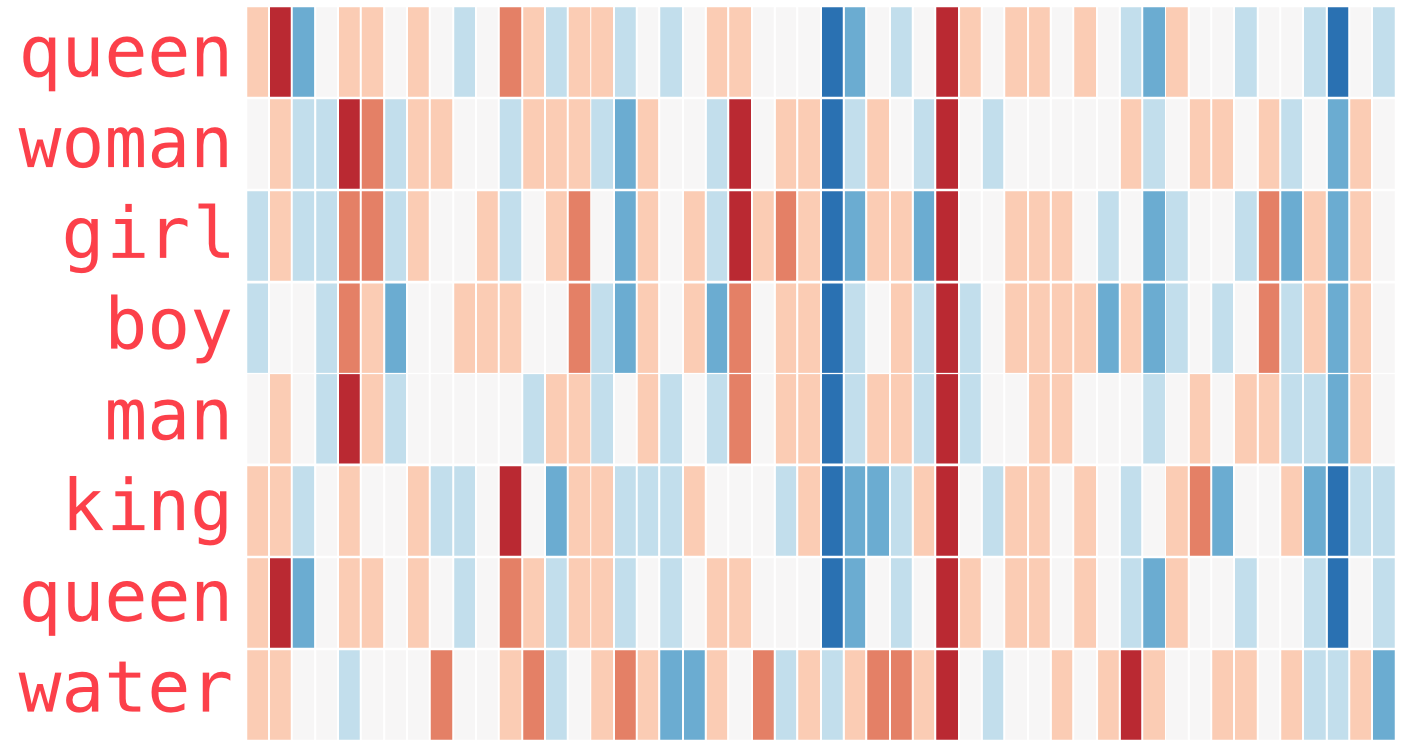

One of the best examples would be the next-word prediction feature of a smartphone keyboard. It’s a feature that billions of people use hundreds of times every day.

Next-word prediction is a task that can be addressed by a language model. A language model can take a list of words (let’s say two words), and attempt to predict the word that follows them.

In the screenshot above, we can think of the model as one that took in these two green words (thou shalt) and returned a list of suggestions (“not” being the one with the highest probability):


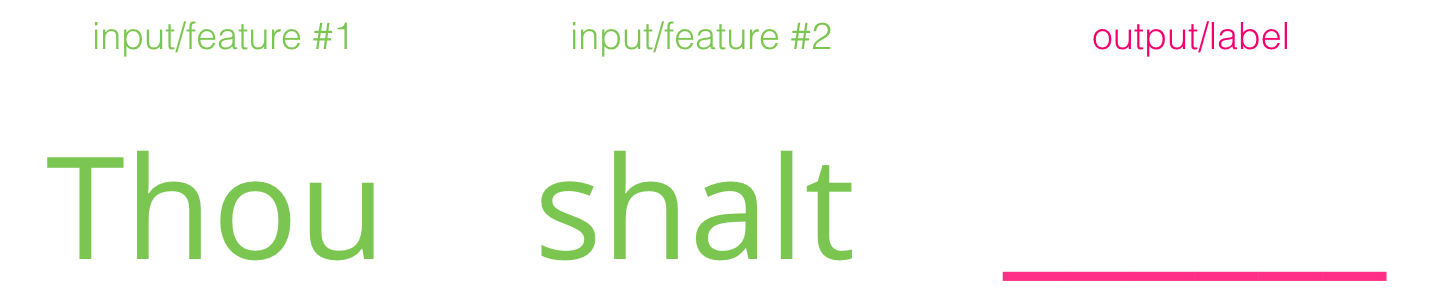

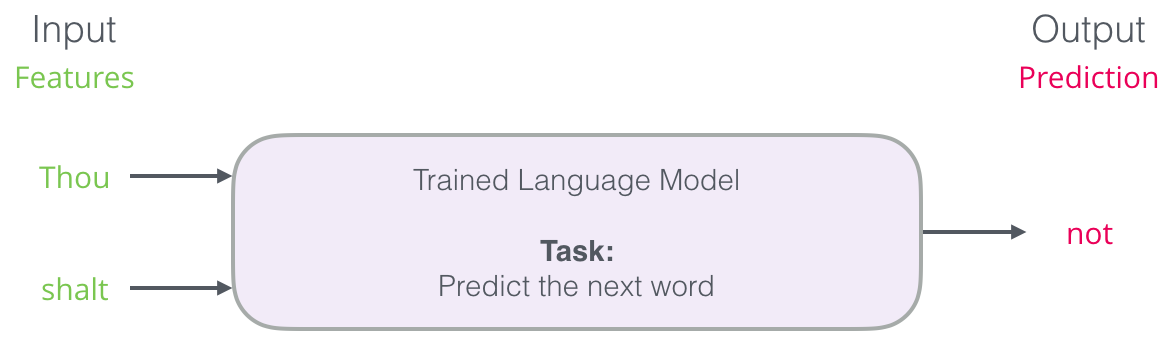

But in practice, the model doesn’t output only one word. It actually outputs a probability score for all the words it knows (the model’s “vocabulary”, which can range from a few thousand to over a million words). The keyboard application then has to find the words with the highest scores, and present those to the user.
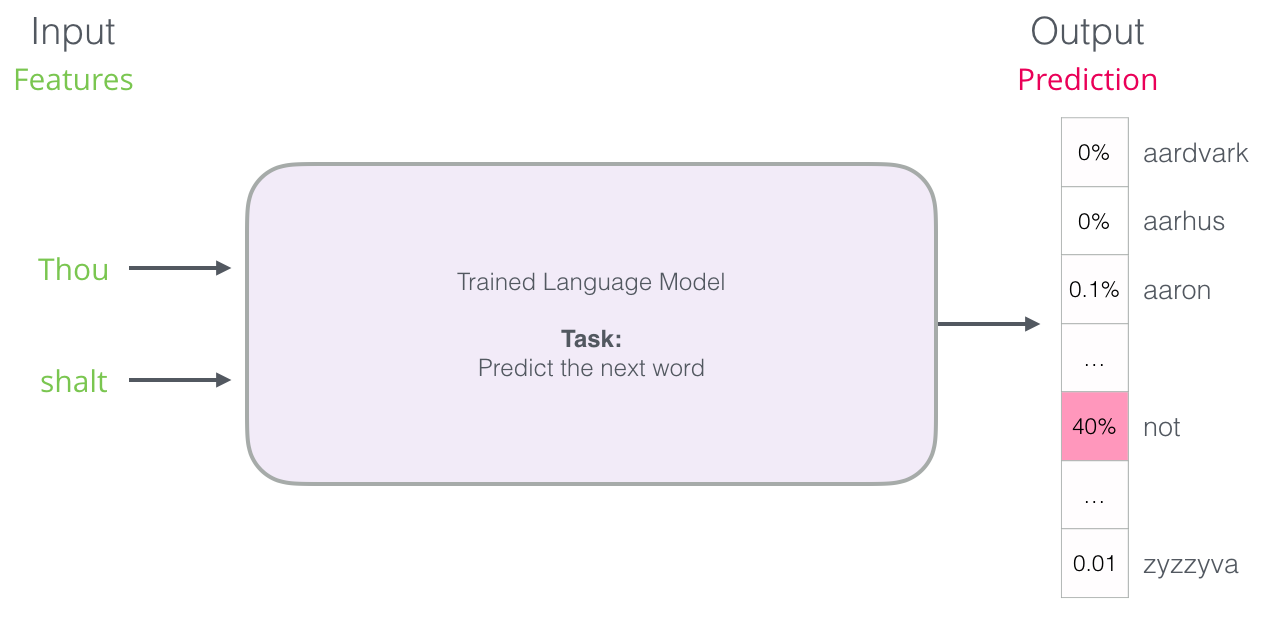


After the training :
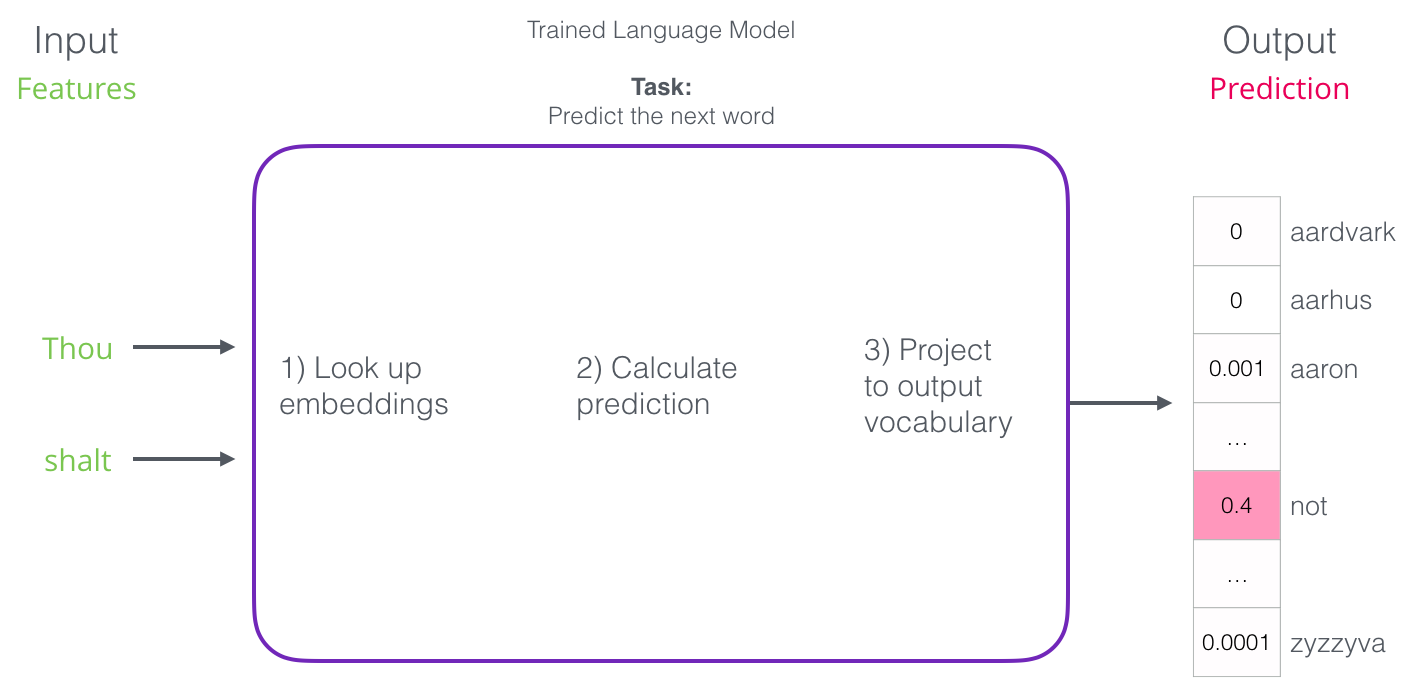

During prediction time, we just look up the embeddings of the input word, and use them to calculate the prediction.

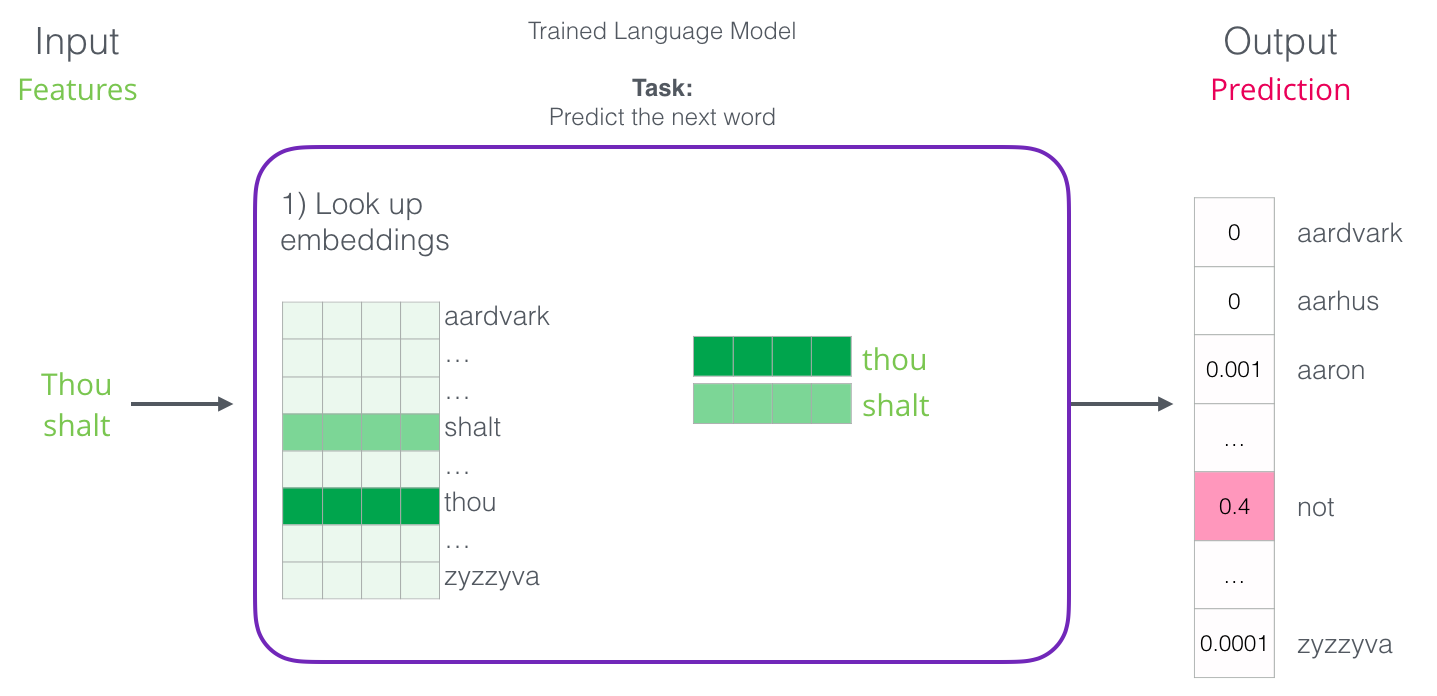

Language models have a huge advantage over most other machine learning models. That advantage is that we are able to train them on running text – which we have an abundance of. Think of all the books, articles, Wikipedia content, and other forms of text data we have lying around. Contrast this with a lot of other machine learning models which need hand-crafted features and specially-collected data.

Words get their embeddings by us looking at which other words they tend to appear next to. The mechanics of that is that

* We get a lot of text data (say, all Wikipedia articles, for example). then
* We have a window (say, of three words) that we slide against all of that text.
* The sliding window generates training samples for our model

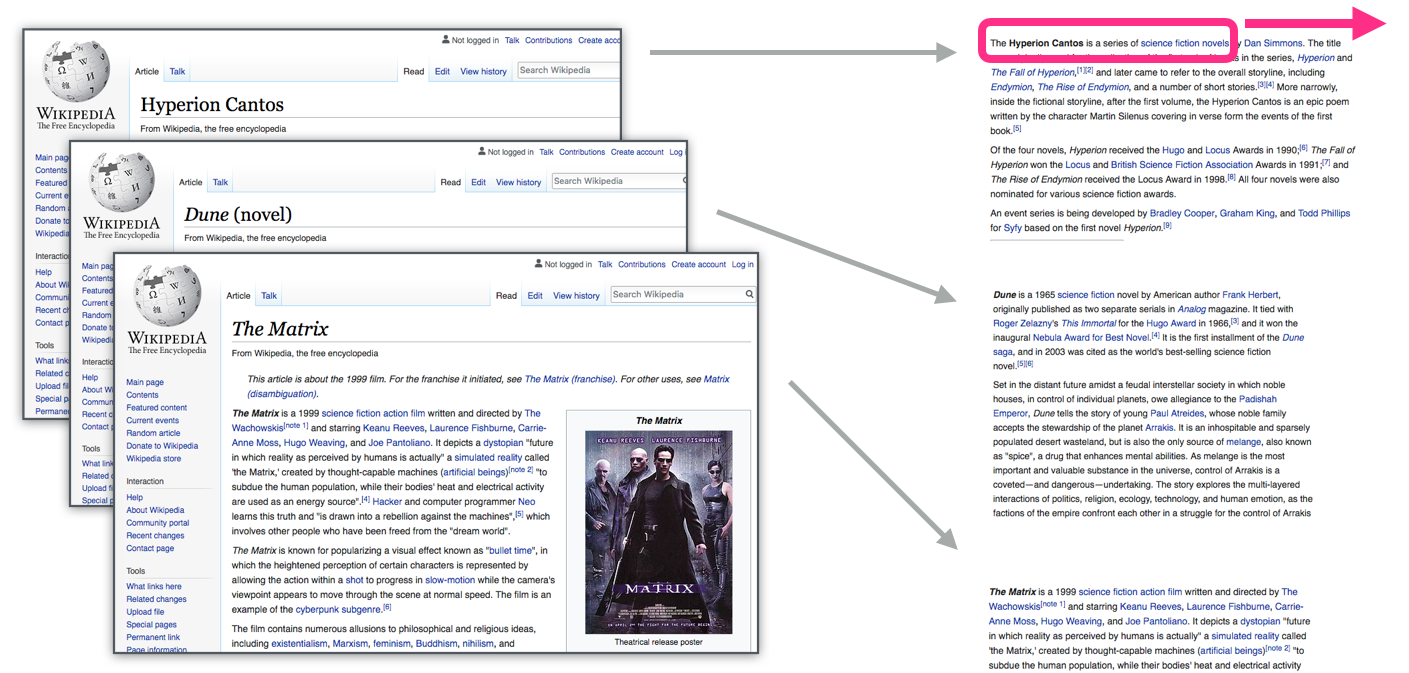



As this window slides against the text, we (virtually) generate a dataset that we use to train a model. To look exactly at how that’s done, let’s see how the sliding window processes this phrase:

*“Thou shalt not make a machine in the likeness of a human mind” ~Dune*

We start, the window is on the first three words of the sentence

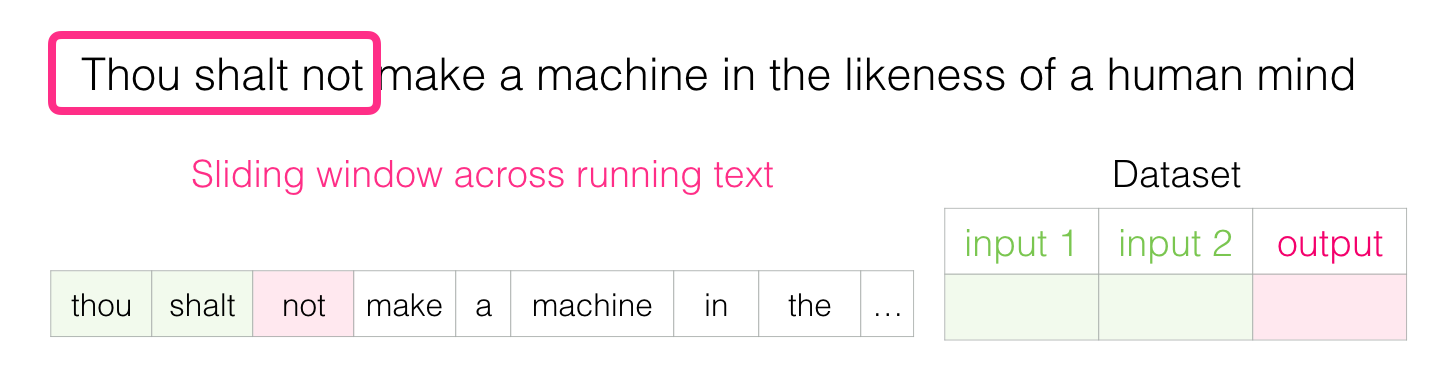

We take the first two words to be features, and the third word to be a label:

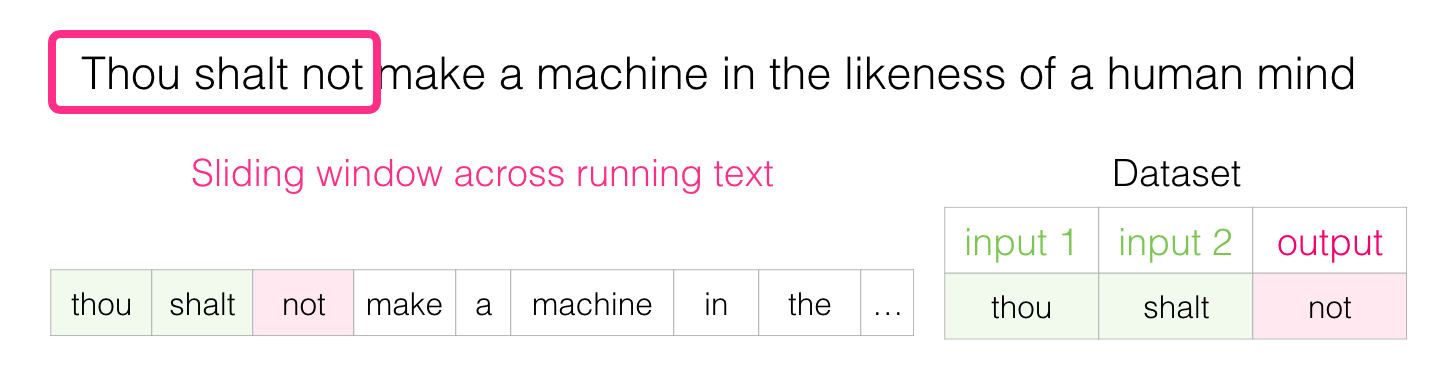

We then slide our window to the next position and create a second sample

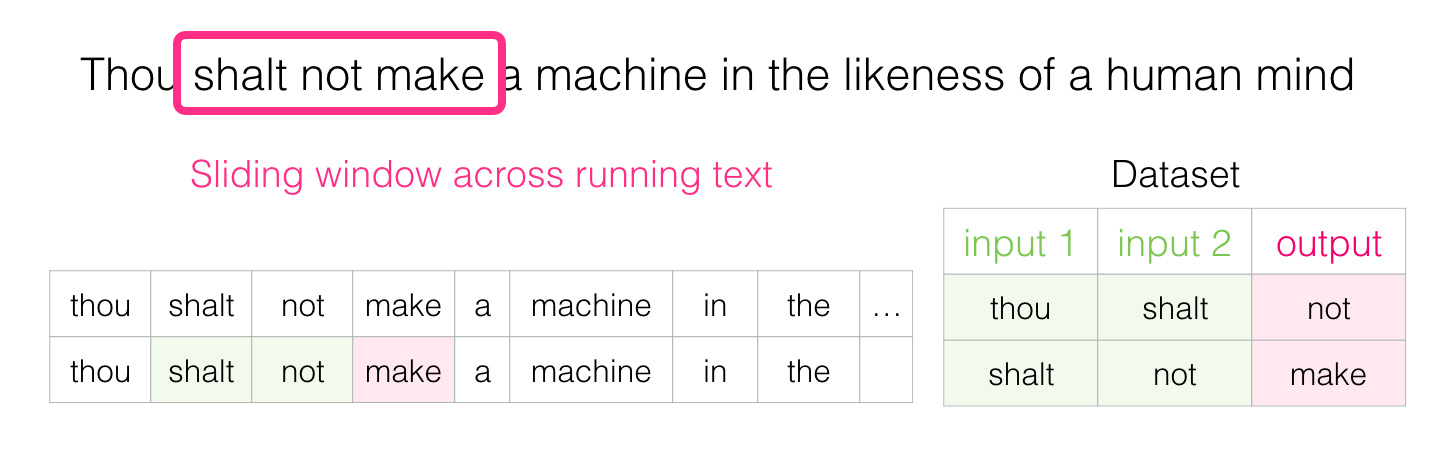

And pretty soon we have a larger dataset of which words tend to appear after different pairs of words

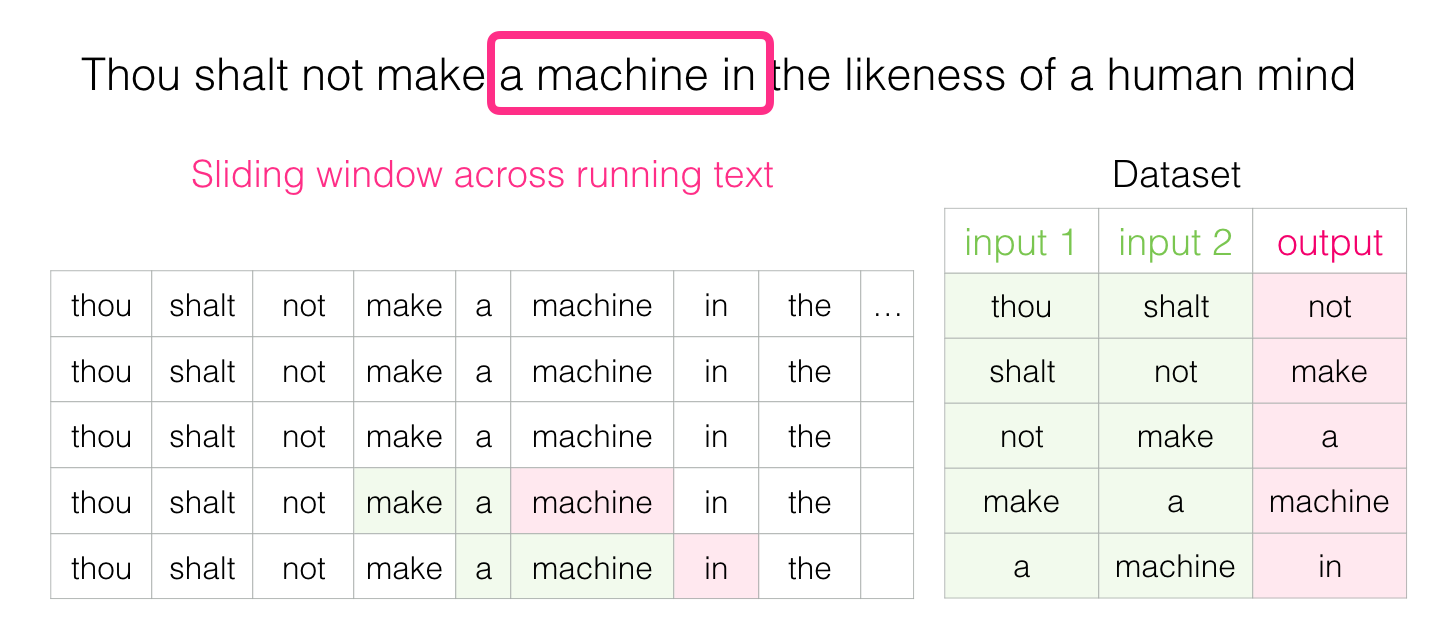

**SkipGram Vs CBOW**

Instead of only looking two words before the target word, we can also look at two words after it.

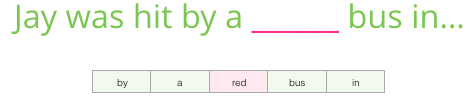



When we do this, the dataset we’re virtually building and training the model against would look like this:

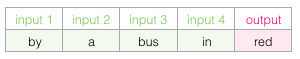

This is called a Continuous Bag of Words architecture.

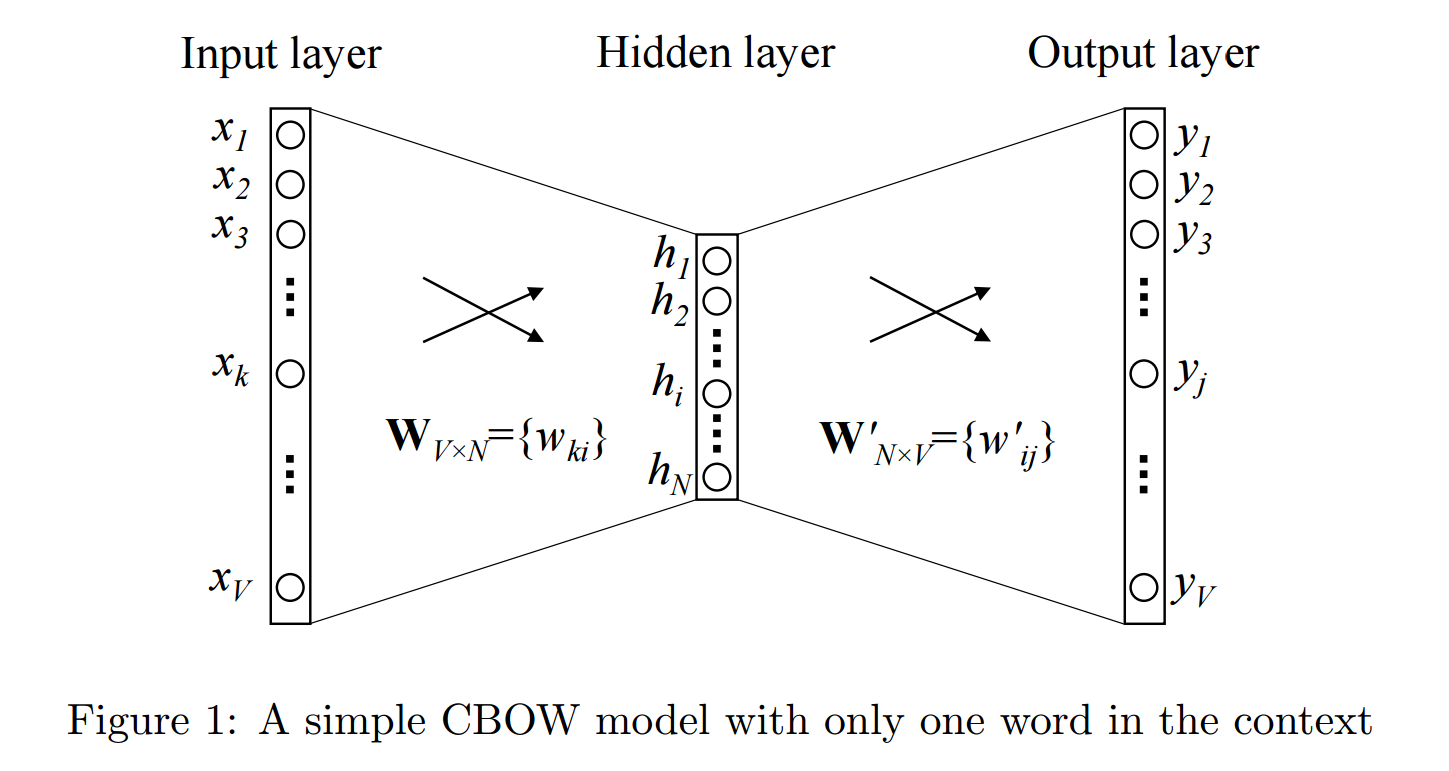

Instead of guessing a word based on its context (the words before and after it), this other architecture tries to guess neighboring words using the current word. We can think of the window it slides against the training text as looking like this

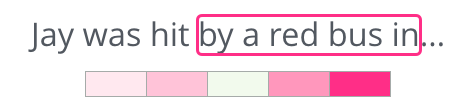

The pink boxes are in different shades because this sliding window actually creates four separate samples in our training dataset

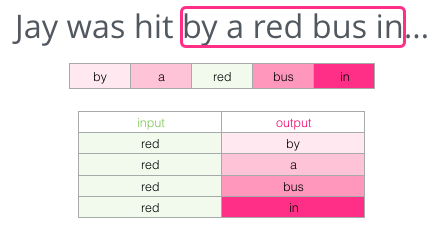

This method is called the skipgram architecture. We can visualize the sliding window as doing the following

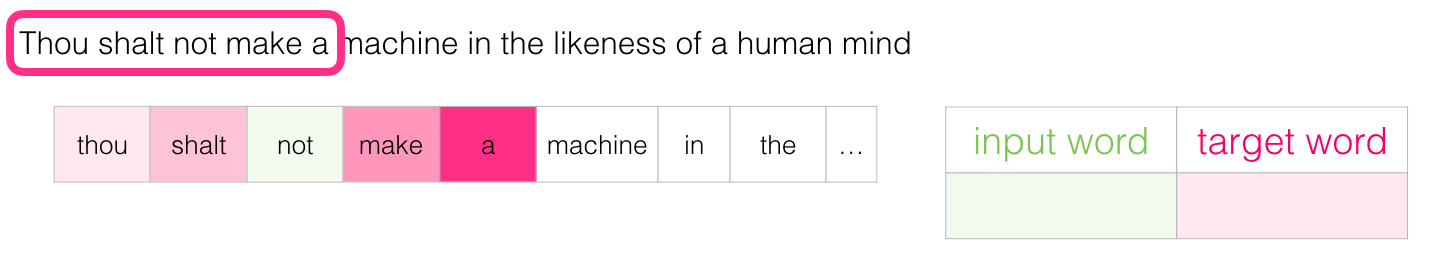

This would add these four samples to our training dataset

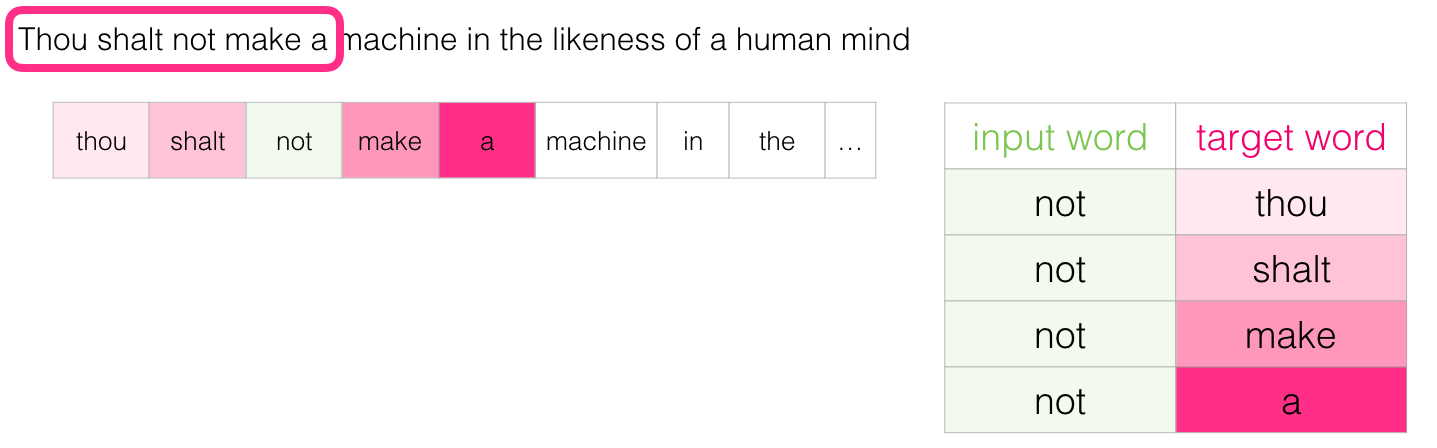

We then slide our window to the next position

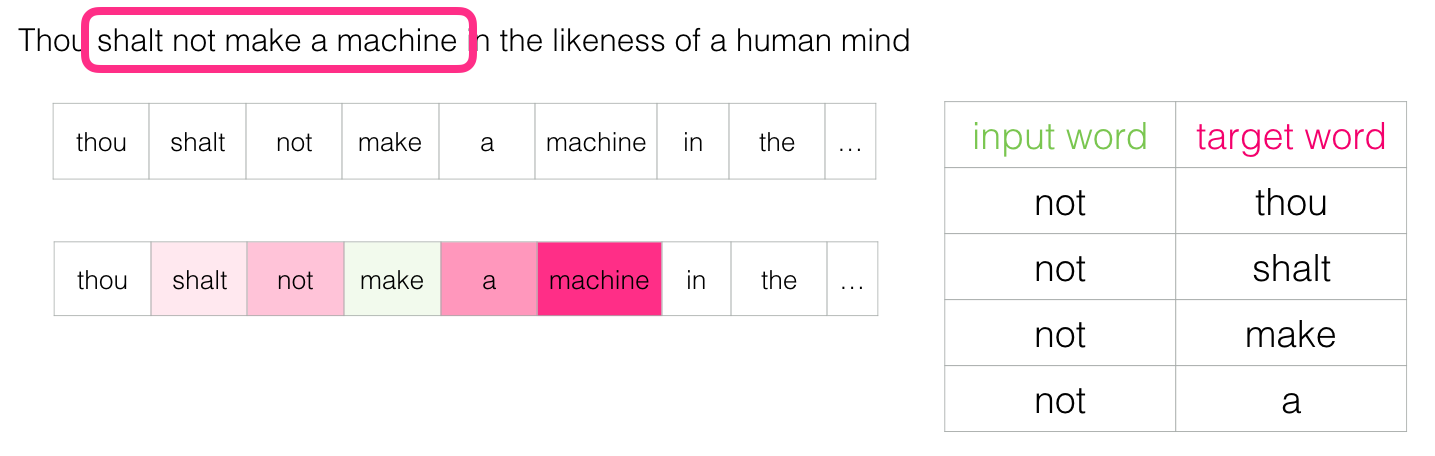

Which generates our next four examples

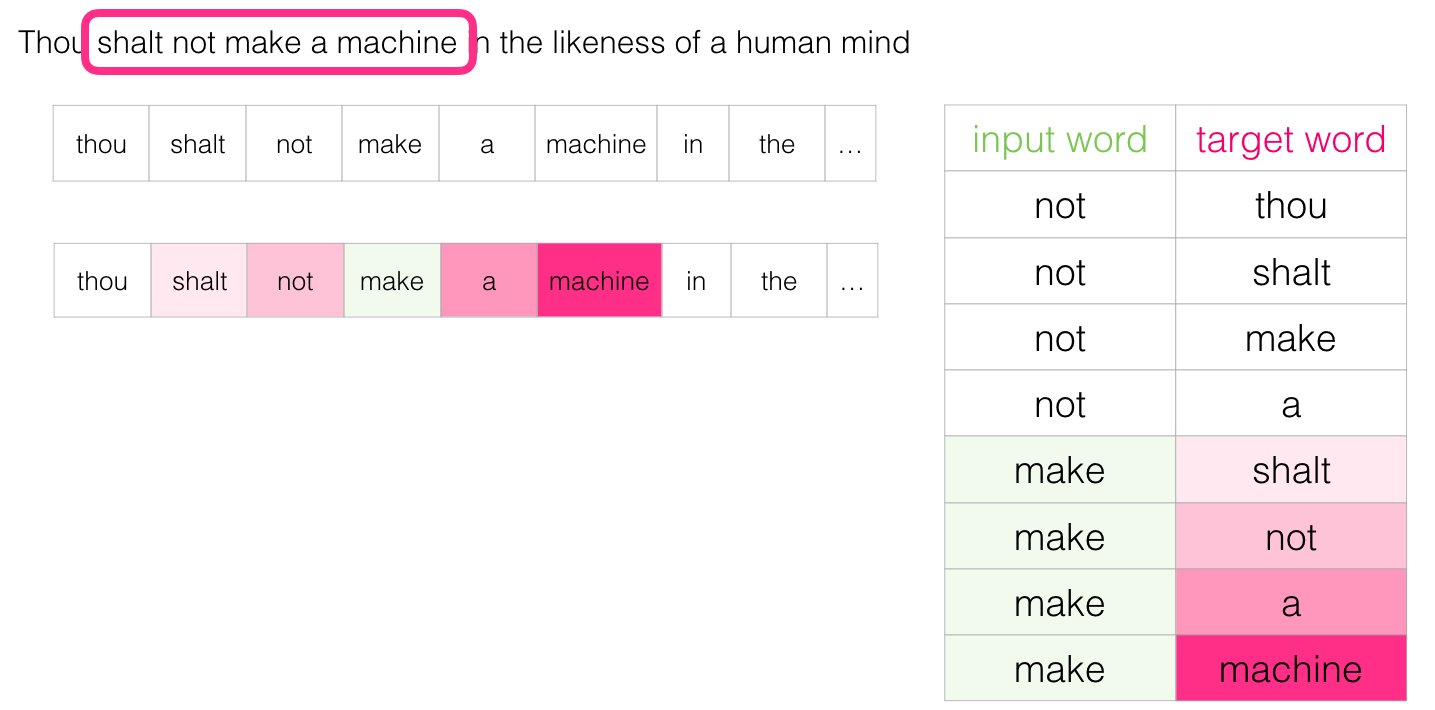

A couple of positions later, we have a lot more examples

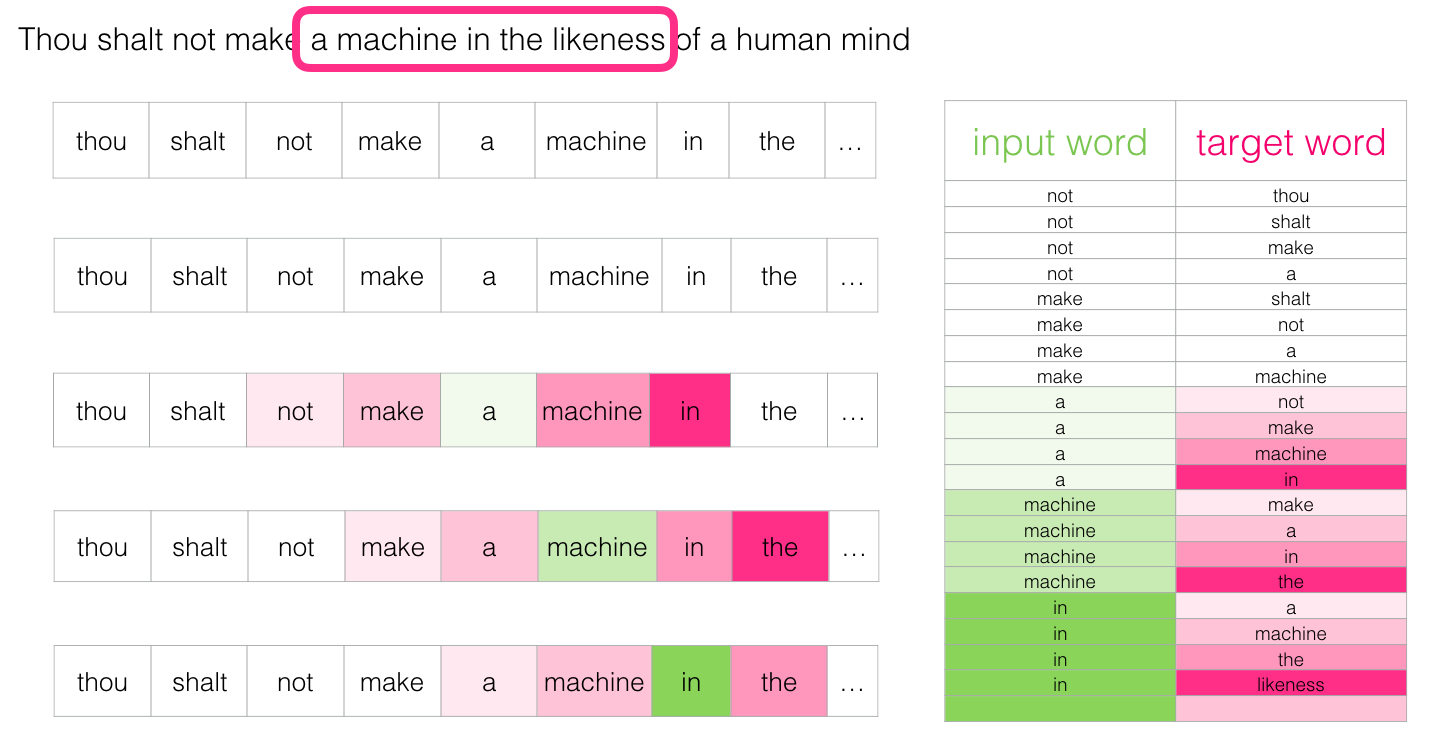

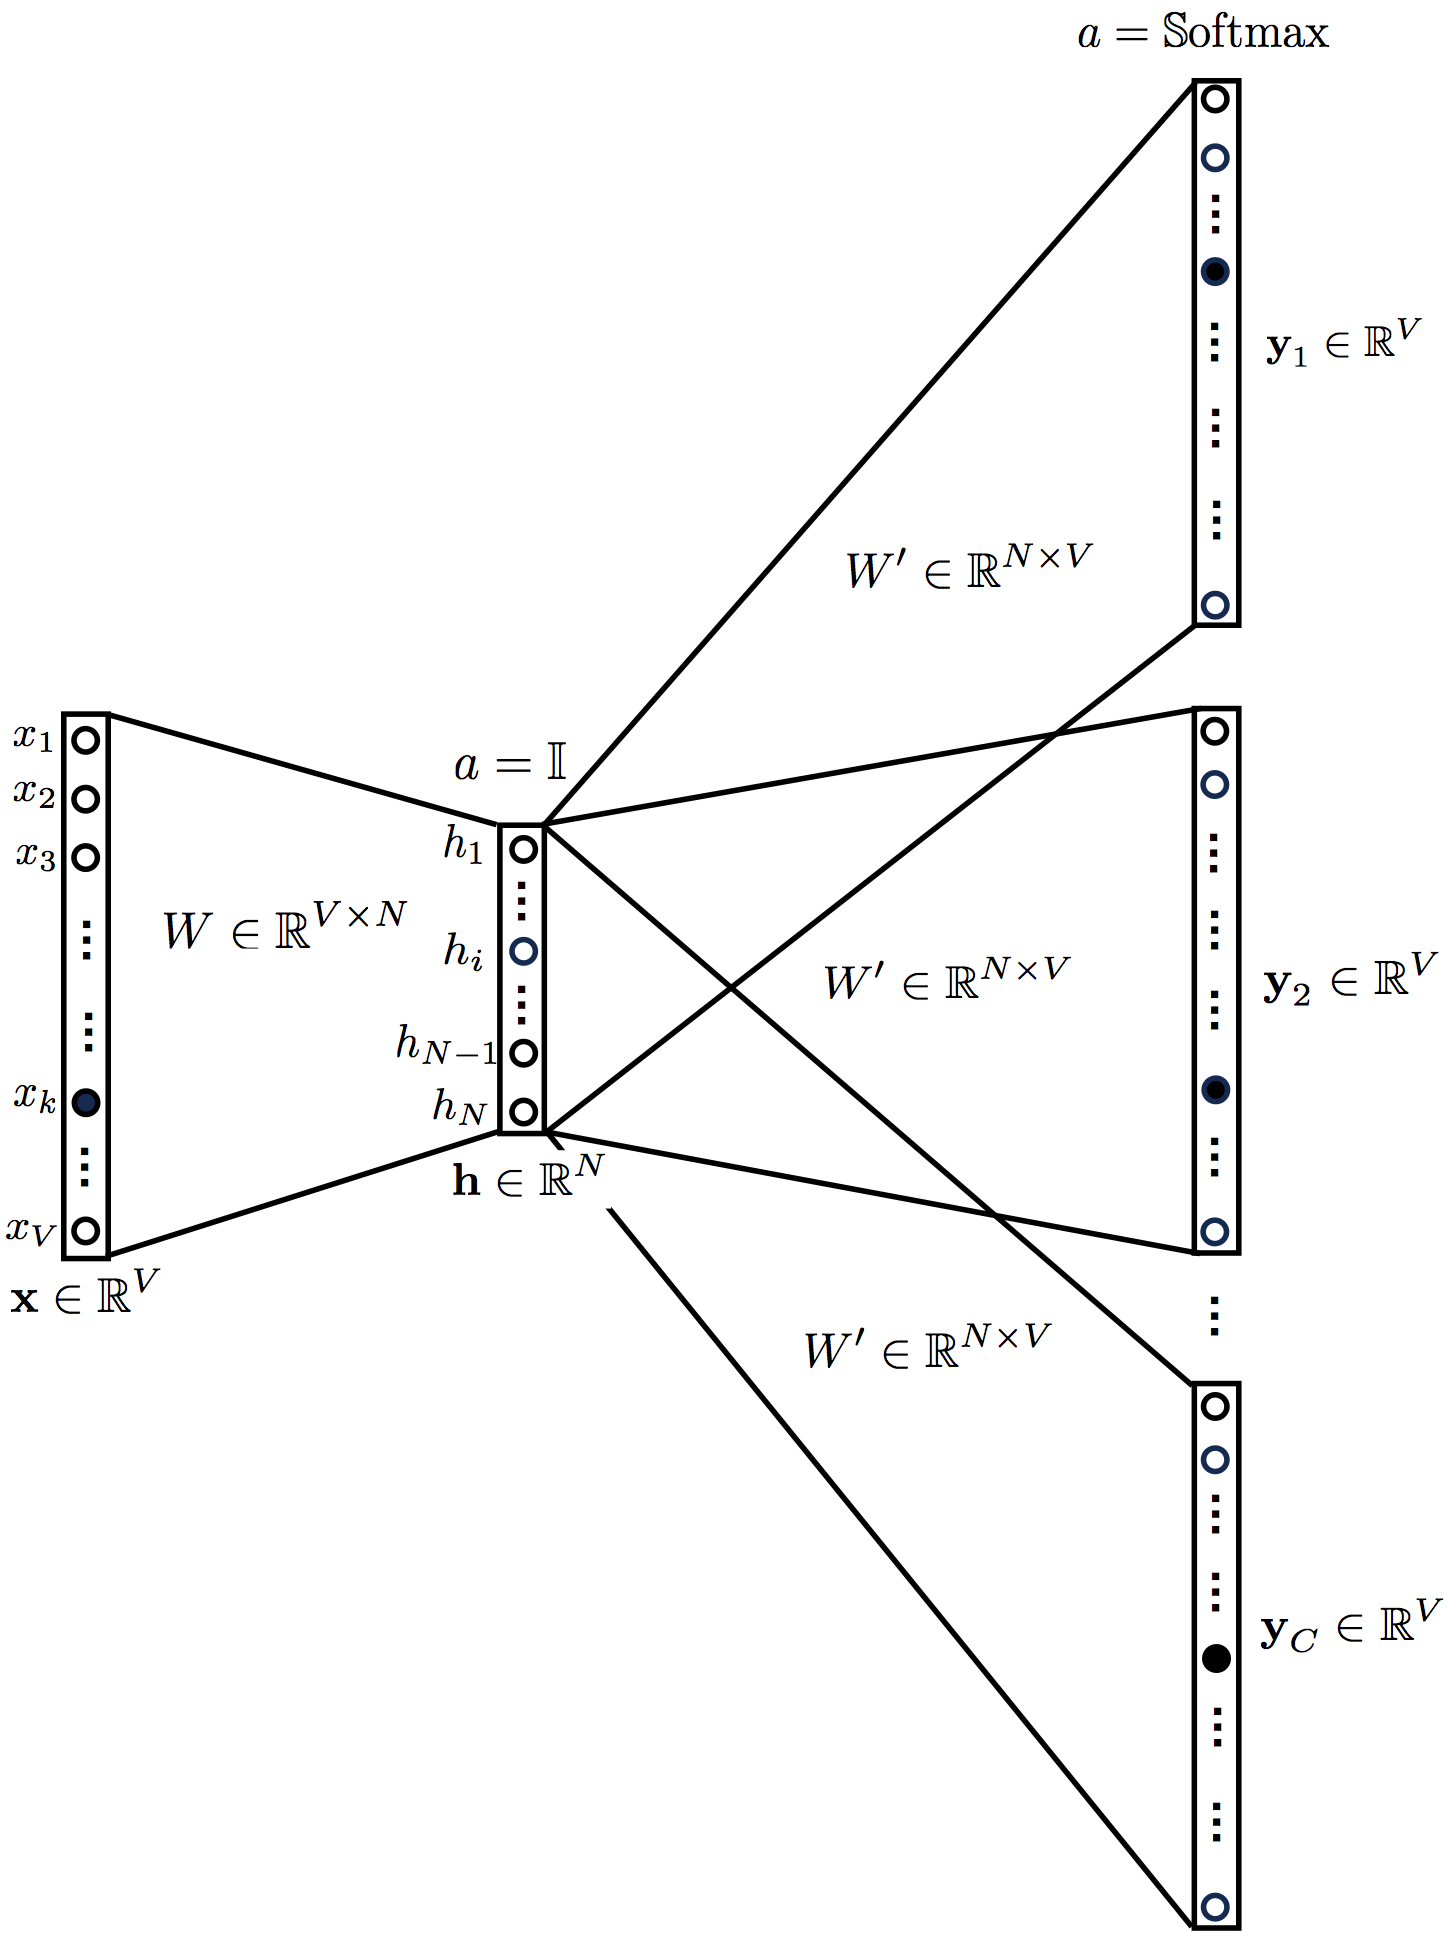

Skip Gram works well with small amount of data and is found to represent rare words well.
On the other hand, CBOW is faster and has better representations for more frequent words.

### Gensim

Gensim is an open-source library for unsupervised topic modeling and natural language processing, using modern statistical machine learning.

Gensim is implemented in Python and Cython for performance. Gensim is designed to handle large text collections using data streaming and incremental online algorithms, which differentiates it from most other machine learning software packages that target only in-memory processing.

Gensim includes streamed parallelized implementations of fastText, word2vec and doc2vec algorithms.

In [ ]:
# training using Gensim Word2Vec
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

#sample
# model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = model.wv
print(words)
# access vector for one word
print(model.wv.get_vector("final", norm=True))
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec<vocab=14, vector_size=100, alpha=0.025>
KeyedVectors<vector_size=100, 14 keys>
[-0.12348268  0.02146596 -0.12413479 -0.03882489  0.06433234  0.10089484
  0.02072483  0.03637069 -0.07109694  0.12497572 -0.10909214  0.08038233
 -0.14217988  0.03522454 -0.08608747 -0.07347175 -0.05377573  0.09781746
  0.10029424 -0.0860459   0.01337621 -0.14695044  0.13508527  0.16012225
 -0.04743371  0.01384137  0.01291475  0.09475031 -0.14885831  0.01010926
  0.11881956  0.03859962  0.01945339 -0.1612442   0.14671847 -0.10834985
 -0.05175873  0.06043161 -0.01336405  0.02441094  0.0308229  -0.11811865
 -0.1682089   0.1563739   0.107207   -0.11957207  0.05886963  0.00356426
  0.08222497 -0.12315279  0.06965373  0.07519705  0.17223142 -0.07738174
 -0.02402993 -0.12656683 -0.16774218 -0.15706012 -0.01769047 -0.11248662
  0.08388516 -0.10661842  0.04357405  0.01279002 -0.05867368 -0.01693751
  0.17260772  0.1581953  -0.07717573  0.15710802 -0.0975849   0.10258644
 -0.05357221  0.05935859  0.0521886 

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(min_count =1)
model.build_vocab(sentences)
model.train(sentences, epochs=10)
# fit a 2d PCA model to the vectors
word_vectors = model.wv
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

ValueError: ignored

In [ ]:
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

# Download the "glove-twitter-50" embeddings
glove_vectors = gensim.downloader.load('glove-twitter-50')

# Use the downloaded vectors as usual:
glove_vectors.most_similar('twitter', topn=10)

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']
[==================================================] 100.0% 199.5/199.5MB downloaded


[('facebook', 0.935446560382843),
 ('fb', 0.9216364622116089),
 ('tweet', 0.894340991973877),
 ('instagram', 0.8829589486122131),
 ('chat', 0.8607302904129028),
 ('tumblr', 0.8572156429290771),
 ('tweets', 0.8523541688919067),
 ('tl', 0.8520061373710632),
 ('internet', 0.8418295979499817),
 ('timeline', 0.8414895534515381)]

In [ ]:
glove_vectors.get_vector("google")

array([ 1.0519  ,  0.60461 , -1.0756  ,  0.45193 , -0.064418,  0.17597 ,
        0.30264 , -0.70928 ,  0.73155 ,  0.13197 ,  0.29944 ,  0.20064 ,
       -2.927   ,  0.099191, -0.62304 , -0.12481 ,  0.36649 ,  0.77723 ,
        1.0052  , -0.49404 , -0.35774 , -0.72642 , -0.38302 , -0.69603 ,
       -0.86929 , -1.1595  ,  0.30699 , -0.043333,  0.13824 ,  0.063458,
       -0.32907 , -0.27476 , -0.60251 , -1.1986  ,  1.0312  ,  0.23446 ,
        0.56289 , -0.30764 , -0.56176 , -0.64596 , -1.3328  ,  0.22566 ,
       -0.93916 ,  0.48007 ,  0.57339 , -0.42139 , -0.78537 ,  0.20075 ,
       -1.1138  , -0.026187], dtype=float32)

In [ ]:
glove_vectors.most_similar("google")

[('facebook', 0.8765765428543091),
 ('app', 0.8763977289199829),
 ('yahoo', 0.8640940189361572),
 ('microsoft', 0.8631904125213623),
 ('internet', 0.8434529304504395),
 ('web', 0.841865599155426),
 ('mobile', 0.8338963389396667),
 ('apple', 0.8337891697883606),
 ('ios', 0.8262221813201904),
 ('maps', 0.8222665190696716)]

In [ ]:
glove_vectors.most_similar('computer', topn=5)

[('cell', 0.8157469630241394),
 ('laptop', 0.811658501625061),
 ('desktop', 0.8046691417694092),
 ('phone', 0.8026933670043945),
 ('computers', 0.7978081703186035)]

In [ ]:
glove_vectors.most_similar('shopping', topn=5)

[('shop', 0.7812623381614685),
 ('home', 0.7648602724075317),
 ('hotel', 0.7633457779884338),
 ('holiday', 0.7608271837234497),
 ('shops', 0.7517551183700562)]

In [ ]:
tokens = list(glove_vectors)
print(tokens[:100])

KeyError: ignored

In [ ]:
len(glove_vectors)

1193514

In [ ]:
glove_vectors.most_similar('dog')

[('cat', 0.9429584741592407),
 ('dogs', 0.8918037414550781),
 ('puppy', 0.8790459632873535),
 ('pet', 0.8722651600837708),
 ('bear', 0.8573998212814331),
 ('cats', 0.851166307926178),
 ('kid', 0.8403224349021912),
 ('horse', 0.8380487561225891),
 ('monkey', 0.8318661451339722),
 ('pig', 0.8194695115089417)]

In [ ]:
glove_vectors.most_similar('good')

[('well', 0.9244242310523987),
 ('great', 0.9227153062820435),
 ('too', 0.9198312163352966),
 ('nice', 0.9169182181358337),
 ('better', 0.9147132039070129),
 ('day', 0.9091806411743164),
 ('this', 0.9072596430778503),
 ('it', 0.9027184247970581),
 ('night', 0.8996105790138245),
 ('way', 0.8987061381340027)]

In [ ]:

glove_vectors = gensim.downloader.load('glove-wiki-gigaword-300')

# Use the downloaded vectors as usual:
glove_vectors.most_similar('dog')

[('dogs', 0.7888557314872742),
 ('cat', 0.6816746592521667),
 ('pet', 0.6291598081588745),
 ('puppy', 0.593606173992157),
 ('hound', 0.5468214750289917),
 ('horse', 0.5369751453399658),
 ('animal', 0.5316445827484131),
 ('cats', 0.5080744028091431),
 ('canine', 0.5038436055183411),
 ('pets', 0.5019966959953308)]

In [ ]:
glove_vectors.get_vector("dog")

array([-1.1043e-01,  8.1217e-01,  7.3668e-02,  1.9023e-01, -5.2888e-02,
        6.1468e-02,  1.6076e-01,  4.1302e-01, -3.0199e-01, -9.0827e-01,
        2.7504e-01, -3.1890e-02, -2.8842e-01,  2.3447e-01,  4.7679e-01,
        5.0124e-01,  2.9371e-01,  2.7029e-01,  5.4745e-02,  9.8038e-02,
        5.7116e-01,  3.6755e-01,  4.0734e-02,  3.4347e-01, -1.8256e-01,
       -2.8935e-01,  2.3826e-02, -1.9401e-01,  2.4444e-01,  1.3407e-01,
       -1.6494e-01, -2.6983e-01, -2.6234e-01, -2.1779e-01, -8.7528e-01,
        7.3822e-01, -8.7931e-02, -1.0876e-02, -2.6540e-01,  3.4668e-01,
       -5.5814e-01,  1.7591e-01,  1.6926e-01, -1.5725e-01, -5.0430e-01,
       -2.0100e-01,  6.6701e-01, -3.2518e-02,  4.5012e-02,  6.5675e-02,
       -1.6061e-01, -7.3363e-01,  2.4642e-01,  3.4325e-01,  2.1899e-01,
        4.8646e-02, -5.9987e-01, -5.8153e-02, -5.1694e-02, -5.7846e-01,
        3.0000e-01,  3.5078e-01,  4.6646e-01, -7.5309e-03,  1.0455e-01,
       -5.1016e-01, -5.5987e-02, -1.0295e-01, -2.6476e-01, -4.12

In [ ]:
glove_vectors.get_vector("cat")

array([-0.29353  ,  0.33247  , -0.047372 , -0.12247  ,  0.071956 ,
       -0.23408  , -0.06238  , -0.0037192, -0.39462  , -0.69411  ,
        0.36731  , -0.12141  , -0.044485 , -0.15268  ,  0.34864  ,
        0.22926  ,  0.54361  ,  0.25215  ,  0.097972 , -0.087305 ,
        0.87058  , -0.12211  , -0.079825 ,  0.28712  , -0.68563  ,
       -0.27265  ,  0.22056  , -0.75752  ,  0.56293  ,  0.091377 ,
       -0.71004  , -0.3142   , -0.56826  , -0.26684  , -0.60102  ,
        0.26959  , -0.17992  ,  0.10701  , -0.57858  ,  0.38161  ,
       -0.67127  ,  0.10927  ,  0.079426 ,  0.022372 , -0.081147 ,
        0.011182 ,  0.67089  , -0.19094  , -0.33676  , -0.48471  ,
       -0.35406  , -0.15209  ,  0.44503  ,  0.46385  ,  0.38409  ,
        0.045081 , -0.59079  ,  0.21763  ,  0.38576  , -0.44567  ,
        0.009332 ,  0.442    ,  0.097062 ,  0.38005  , -0.11881  ,
       -0.42718  , -0.31005  , -0.025058 ,  0.12689  , -0.13468  ,
        0.11976  ,  0.76253  ,  0.2524   , -0.26934  ,  0.0686

In [ ]:
tokens = list(glove_vectors.vocab)
print(tokens[:100])
print(len(tokens))

['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s", 'for', '-', 'that', 'on', 'is', 'was', 'said', 'with', 'he', 'as', 'it', 'by', 'at', '(', ')', 'from', 'his', "''", '``', 'an', 'be', 'has', 'are', 'have', 'but', 'were', 'not', 'this', 'who', 'they', 'had', 'i', 'which', 'will', 'their', ':', 'or', 'its', 'one', 'after', 'new', 'been', 'also', 'we', 'would', 'two', 'more', "'", 'first', 'about', 'up', 'when', 'year', 'there', 'all', '--', 'out', 'she', 'other', 'people', "n't", 'her', 'percent', 'than', 'over', 'into', 'last', 'some', 'government', 'time', '$', 'you', 'years', 'if', 'no', 'world', 'can', 'three', 'do', ';', 'president', 'only', 'state', 'million', 'could', 'us', 'most', '_', 'against', 'u.s.']
400000


## fasttext by Fb

FastText is an open-source, free, lightweight library that allows users to learn text representations and text classifiers. It works on standard, generic hardware. Models can later be reduced in size to even fit on mobile devices.

fastText is another word embedding method that is an extension of the word2vec model. Instead of learning vectors for words directly, fastText represents each word as an n-gram of characters. So, for example, take the word, “artificial” with n=3, the fastText representation of this word is <ar, art, rti, tif, ifi, fic, ici, ial, al>, where the angular brackets indicate the beginning and end of the word.   

This helps capture the meaning of shorter words and allows the embeddings to understand suffixes and prefixes. Once the word has been represented using character n-grams, a skip-gram model is trained to learn the embeddings. This model is considered to be a bag of words model with a sliding window over a word because no internal structure of the word is taken into account. As long as the characters are within this window, the order of the n-grams doesn’t matter.  

fastText works well with rare words. So even if a word wasn’t seen during training, it can be broken down into n-grams to get its embeddings.


In [ ]:
from gensim.models import FastText
from gensim.test.utils import common_texts  # some example sentences

print(common_texts)

print(len(common_texts))

model = FastText(window=3, min_count=1)  # instantiate
model.build_vocab(sentences=common_texts)
model.train(sentences=common_texts, total_examples=len(common_texts), epochs=10)

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]
9


TypeError: ignored

In [ ]:
new_vector = model.wv['computer']
print(new_vector)

[ 2.1238720e-04  1.0574872e-03 -2.2376915e-03  5.2235648e-04
  5.2821956e-04 -2.3120285e-04 -1.5547608e-04  2.0175555e-04
 -3.1906350e-03  1.6487628e-03 -5.4902426e-05 -2.6288073e-04
 -1.0333480e-03 -8.9324336e-04  1.1933475e-03  5.8614154e-04
 -4.1156553e-04  9.8192086e-04  1.0736784e-03  5.5450079e-04
  8.7179942e-04 -9.9806683e-05 -5.4491969e-04 -8.0591673e-04
 -7.1207422e-04 -2.6494472e-05 -9.9992845e-05  1.0235173e-04
 -1.8782006e-03 -2.1497253e-04 -1.1244253e-03 -1.9454138e-04
 -1.3705304e-04 -1.9021350e-03 -8.3420385e-04  1.0315579e-03
  1.5209265e-03 -2.2577753e-03 -1.2317149e-03  1.9721148e-04
 -1.2152417e-03 -9.5458730e-04 -1.3560712e-03 -4.8322158e-04
 -4.6158134e-04 -2.2277952e-04 -2.5119015e-03 -6.6766300e-04
 -4.7725701e-04 -5.0753792e-04 -1.0250064e-03 -1.5689014e-03
 -8.2734454e-04 -5.4283405e-04  4.2064182e-04  4.7952461e-04
  5.0205342e-04  8.1681326e-04 -4.9111346e-05 -4.0066076e-04
 -3.1709630e-04  9.8135485e-04  9.8191493e-04 -2.7029554e-03
  1.1123008e-03  1.50024

In [ ]:
from gensim.test.utils import get_tmpfile
fname = get_tmpfile("fasttext.model")
model.save(fname)

In [ ]:
reloaded_model = FastText.load(fname)

Once loaded, such models behave identically to those created from scratch. For example, you can continue training the loaded model

In [ ]:
import numpy as np
new_sentences = [
    ['computer', 'aided', 'design'],
    ['computer', 'science'],
    ['computational', 'complexity'],
    ['military', 'supercomputer'],
    ['central', 'processing', 'unit'],
    ['onboard', 'car', 'computer'],]

reloaded_model.build_vocab(new_sentences, update=True)  # Update the vocabulary
reloaded_model.train(new_sentences, total_examples=len(new_sentences), epochs=model.epochs) #retraining

In [ ]:
gen_vector =reloaded_model.wv['computation']

In [ ]:
gen_vector

array([ 5.0884951e-04,  9.5342408e-04, -2.9340065e-03,  1.2862155e-03,
       -1.0659052e-03, -6.6597079e-04, -1.8402761e-04,  2.4032738e-04,
       -1.6817213e-03,  1.7930331e-03,  1.4270113e-04,  4.3195672e-04,
       -1.0191364e-03, -4.3853596e-04,  1.2039048e-04,  3.4498400e-04,
       -1.1620220e-03,  2.0647945e-03,  2.0628322e-03,  3.5718046e-04,
       -8.1020838e-04,  6.0320611e-04, -6.4823625e-04, -1.3548448e-03,
       -7.5040571e-04, -3.1277773e-04,  7.2949851e-04, -1.3231866e-04,
       -1.4400698e-03,  5.0720188e-04, -1.0187858e-03, -1.5199946e-03,
       -1.4562077e-03,  6.0994504e-04, -9.9285773e-04,  1.0864693e-04,
       -1.0698342e-04, -6.0533313e-04, -1.2571755e-03,  8.0699037e-04,
        7.0644141e-04, -9.4901398e-04, -1.5284988e-03, -2.0829558e-03,
       -8.0039626e-04,  4.0837214e-04, -1.7141504e-03,  5.8095576e-04,
        3.8896345e-05, -5.8473245e-04, -7.0665404e-04, -1.2346917e-03,
       -6.6451158e-04, -5.9866428e-04, -1.4826737e-03, -2.3780316e-04,
      

In [ ]:
print(gen_vector.shape)

(100,)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(new_vector.reshape(1,-1), gen_vector.reshape(1,-1))

array([[0.7177073]], dtype=float32)

## Document to Vector(Doc2Vec)

With the Word2Vec model, we can calculate the vectors for each word in a document. But what if we want to calculate a vector for the entire document? We could average the vectors for each word in the document - while this is quick and crude, it can often be useful.

But wait.!!! There is a better way

**Paragraph Vector model or Doc2Vec**

Le and Mikolov in 2014 introduced the Doc2Vec algorithm, which usually outperforms such simple-averaging of Word2Vec vectors.

The basic idea is: act as if a document has another floating word-like vector, which contributes to all training predictions, and is updated like other word-vectors, but we will call it a doc-vector. Gensim’s Doc2Vec class implements this algorithm.

There are two implementations:

* Paragraph Vector - Distributed Memory (PV-DM)

* Paragraph Vector - Distributed Bag of Words (PV-DBOW)

PV-DM is analogous to Word2Vec CBOW. The doc-vectors are obtained by training a neural network on the synthetic task of predicting a center word based an average of both context word-vectors and the full document’s doc-vector.

PV-DBOW is analogous to Word2Vec SG. The doc-vectors are obtained by training a neural network on the synthetic task of predicting a target word just from the full document’s doc-vector. (It is also common to combine this with skip-gram testing, using both the doc-vector and nearby word-vectors to predict a single target word, but only one at a time.)

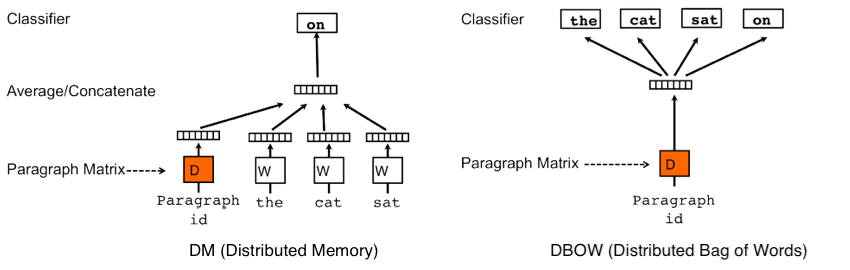

In [ ]:
import os
import gensim
# Set file names for train and test data
test_data_dir = os.path.join(gensim.__path__[0], 'test', 'test_data')
lee_train_file = os.path.join(test_data_dir, 'lee_background.cor')
lee_test_file = os.path.join(test_data_dir, 'lee.cor')

In [ ]:
import smart_open

def read_corpus(fname, tokens_only=False):
    with smart_open.open(fname, encoding="iso-8859-1") as f:
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(lee_train_file))
test_corpus = list(read_corpus(lee_test_file, tokens_only=True))

In [ ]:
print(train_corpus[:79])

[TaggedDocument(words=['hundreds', 'of', 'people', 'have', 'been', 'forced', 'to', 'vacate', 'their', 'homes', 'in', 'the', 'southern', 'highlands', 'of', 'new', 'south', 'wales', 'as', 'strong', 'winds', 'today', 'pushed', 'huge', 'bushfire', 'towards', 'the', 'town', 'of', 'hill', 'top', 'new', 'blaze', 'near', 'goulburn', 'south', 'west', 'of', 'sydney', 'has', 'forced', 'the', 'closure', 'of', 'the', 'hume', 'highway', 'at', 'about', 'pm', 'aedt', 'marked', 'deterioration', 'in', 'the', 'weather', 'as', 'storm', 'cell', 'moved', 'east', 'across', 'the', 'blue', 'mountains', 'forced', 'authorities', 'to', 'make', 'decision', 'to', 'evacuate', 'people', 'from', 'homes', 'in', 'outlying', 'streets', 'at', 'hill', 'top', 'in', 'the', 'new', 'south', 'wales', 'southern', 'highlands', 'an', 'estimated', 'residents', 'have', 'left', 'their', 'homes', 'for', 'nearby', 'mittagong', 'the', 'new', 'south', 'wales', 'rural', 'fire', 'service', 'says', 'the', 'weather', 'conditions', 'which', '

Now, we’ll instantiate a Doc2Vec model with a vector size with 50 dimensions and iterating over the training corpus 40 times. We set the minimum word count to 2 in order to discard words with very few occurrences. (Without a variety of representative examples, retaining such infrequent words can often make a model worse!) Typical iteration counts in the published Paragraph Vector paper results, using 10s-of-thousands to millions of docs, are 10-20. More iterations take more time and eventually reach a point of diminishing returns.

In [ ]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)

In [ ]:
model.build_vocab(train_corpus)

In [ ]:
print(f"Word 'penalty' vector: {model.wv.get_vector('penalty')} ")

Word 'penalty' vector: [-0.00161298  0.00422726  0.00901402  0.0006013  -0.00408449 -0.00369528
  0.00630334 -0.00281699 -0.00372184  0.00123781 -0.00307601  0.00181451
 -0.00086616  0.00968736 -0.0084341  -0.00017042  0.00720772  0.0071309
 -0.00781743  0.00730839 -0.00727476  0.0065321   0.00728279 -0.00645981
 -0.0043094   0.00286814  0.0002976   0.00661831 -0.00471309 -0.0029883
  0.00571066 -0.00872687 -0.00078205 -0.00743381  0.00452952 -0.00895882
 -0.006969   -0.00862501  0.00455274  0.00778607 -0.00742419 -0.00475384
 -0.00825913 -0.00350927  0.00052963 -0.00314029 -0.00213567  0.0046947
  0.0062145   0.00457485] 


In [ ]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
vector = model.infer_vector(['only', 'you', 'can', 'prevent', 'forest', 'fires'])
print(vector)

[-0.0066275   0.13351704 -0.14626732 -0.0319871  -0.2050812   0.04136733
 -0.10782515 -0.3157819   0.09749047  0.06185832  0.18934168  0.00509747
  0.17366168 -0.03504632 -0.03832439  0.15255365 -0.07318477 -0.09629486
  0.04614563  0.16301113  0.00806124 -0.05903102  0.06701052 -0.00205327
 -0.1918244  -0.16055727  0.3249328   0.11443847 -0.03125147 -0.03133022
  0.09214735 -0.11280628 -0.10207591  0.09508988 -0.12308818  0.0755628
  0.11271121 -0.01754454 -0.22203001  0.19731338  0.15404241  0.01524987
  0.18109752  0.18204048 -0.07434209  0.05129047 -0.20066862  0.20586331
 -0.08473605  0.02159274]


In [ ]:
vector_01 = model.infer_vector(['the','actor', 'got', 'the', 'best','actor', 'award' ,'which','in', 'my' ,'view' ,'is', 'not', 'the' ,'correct' ,'appreciation', 'of', 'talent'])

In [ ]:
print(vector_01)

[-3.7918982e-01 -5.7258424e-03 -6.4997262e-01  1.1623921e-01
 -7.9585141e-01 -2.3912227e-01 -6.6523123e-01 -3.2936025e-01
 -4.2805773e-01 -4.0421274e-02 -4.1967679e-02 -1.1268937e-01
  1.1401863e-01  2.2044245e-02  4.8254885e-02 -2.2483091e-01
  1.8121931e-01 -4.5549476e-01 -1.9030717e-01 -2.5977463e-01
 -1.2691619e-01 -2.5178676e-02 -1.0414698e-01  2.3955511e-01
 -2.9882088e-02  3.4937702e-02  5.7574135e-01 -1.2554541e-01
 -2.4339499e-01 -2.6791224e-01 -1.9804122e-01 -6.3324772e-04
  5.7090331e-02 -1.8488123e-01 -7.5220719e-02 -2.0391107e-01
  9.2918891e-04 -5.1958102e-01 -9.7311161e-02  3.8527247e-02
 -7.9501001e-03 -2.7610427e-02  3.0251687e-02  5.7490575e-01
 -3.6300413e-02  1.3016556e-01 -3.6876154e-01 -2.7602729e-01
 -2.1226254e-01 -1.6882440e-01]


In [ ]:
vector_02 = model.infer_vector(['the','actor', 'did' ,'not', 'deserve', 'the' ,'best' ,'actor', 'award', 'as' ,'he', 'is', 'not', 'a', 'good' ,'actor'])

In [ ]:
print(vector_02)

[-0.39175466  0.27025494 -0.47116143  0.01326608 -0.7956461  -0.3538689
 -0.6911012  -0.04812676 -0.3772171   0.08039295 -0.08008066 -0.0890898
  0.27194932 -0.19937599  0.121923   -0.160299   -0.06933086 -0.46070275
 -0.4979182  -0.23057805 -0.24374275  0.10222065  0.00760191  0.14430904
  0.08713546 -0.3637037   0.4958666   0.10583283 -0.09822203 -0.08592772
 -0.3349769  -0.18658622  0.17201093 -0.20697594  0.1929271  -0.29515177
  0.23053765 -0.38143256 -0.04863271  0.05540574 -0.19731762 -0.03073091
  0.33092478  0.37202144  0.00766087 -0.14579722 -0.45932096 -0.4517787
 -0.5226288  -0.6517267 ]


In [ ]:
vector_01 = vector_01.reshape(1,50)
vector_02 = vector_02.reshape(1,50)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(vector_01, vector_02))

[[0.8223669]]


In [ ]:
vector_03 = model.infer_vector(['the','actor', 'is', 'not', 'doing', 'any', 'new', 'movies', 'this', 'calendar', 'year', 'due', 'to', 'personal', 'reasons'])

In [ ]:
vector_03 = vector_03.reshape(1,50)

In [ ]:
print(cosine_similarity(vector_01, vector_03))

[[0.5337837]]


Note that infer_vector() does not take a string, but rather a list of string tokens, which should have already been tokenized the same way as the words property of original training document objects.

Also note that because the underlying training/inference algorithms are an iterative approximation problem that makes use of internal randomization, repeated inferences of the same text will return slightly different vectors.